In [104]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [105]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def convolve_im(im: np.array,
                kernel: np.array,
                verbose=True):
    """Convolves the image (im) with the spatial kernel (kernel)
    and returns the resulting image.

    "verbose" can be used for turning on/off visualization convolution

    Note: kernel can be of different shape than im.

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [K, K] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    P = im.shape[0] + kernel.shape[0] - 1 
    Q = im.shape[1] + kernel.shape[1] - 1 

    if P % 2 == 0:
        P += 1
    if Q % 2 == 0:
        Q += 1
        
    kernel = np.pad(kernel, ((0, P - kernel.shape[0]), (0, Q - kernel.shape[1])), 'constant')
    padded_im = np.pad(im, ((0, P - im.shape[0]), (0, Q - im.shape[1])), 'constant')
    
    fft_im = np.fft.fft2(padded_im)
    fft_kernel = np.fft.fft2(kernel, s=fft_im.shape)
    
    # Multiplication in the frequency domain
    filtered_fft = fft_im * fft_kernel
    
    # Inverse FFT to obtain spatial domain result
    conv_result = np.fft.ifft2(filtered_fft)
    conv_result = np.abs(conv_result)
    conv_result = conv_result[:im.shape[0], :im.shape[1]]

    if verbose:
        # Use plt.subplot to place two or more images beside each other
        plt.figure(figsize=(20, 4))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.subplot(1, 5, 2)
        plt.imshow(np.log(np.abs(np.fft.ifftshift(fft_im))), cmap="gray")
        plt.subplot(1, 5, 3)
        plt.imshow((np.abs(np.fft.ifftshift(fft_kernel))), cmap="gray")
        plt.subplot(1, 5, 4)
        plt.imshow(np.log(np.abs(np.fft.ifftshift(filtered_fft))), cmap="gray")
        plt.subplot(1, 5, 5)
        plt.imshow((conv_result), cmap="gray")

    ### END YOUR CODE HERE ###
    return conv_result



def spat_convolve_im(im, kernel, verbose=True
                ):
    """ A function that convolves im with kernel

    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]

    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    # assert len(im.shape) == 3

    # Padding
    pad = kernel.shape[0] // 2
    im = np.pad(im, pad_width=((pad, pad), (pad, pad)), mode='reflect')
    result = np.zeros_like(im)
    

    # Convolution
    for h in range(pad+1, len(im) - pad):
        for w in range(pad+1, len(im[h]) - pad):
            result[h][w] = np.sum(im[h-pad:h+pad+1, w-pad:w+pad+1] * kernel)
               

    result = result[pad:-pad, pad:-pad]
    return result

/tmp/ipykernel_7855/608115879.py:57: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(np.fft.ifftshift(filtered_fft))), cmap="gray")


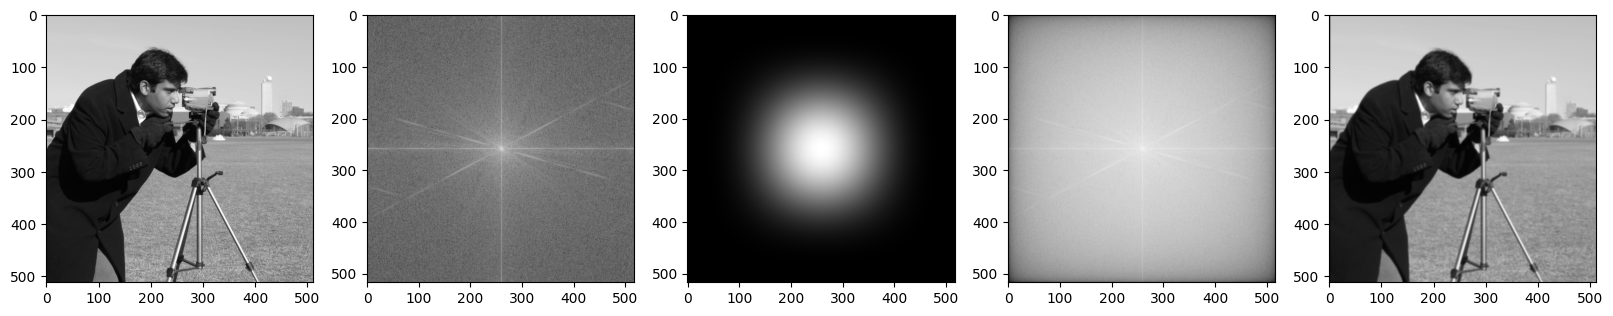

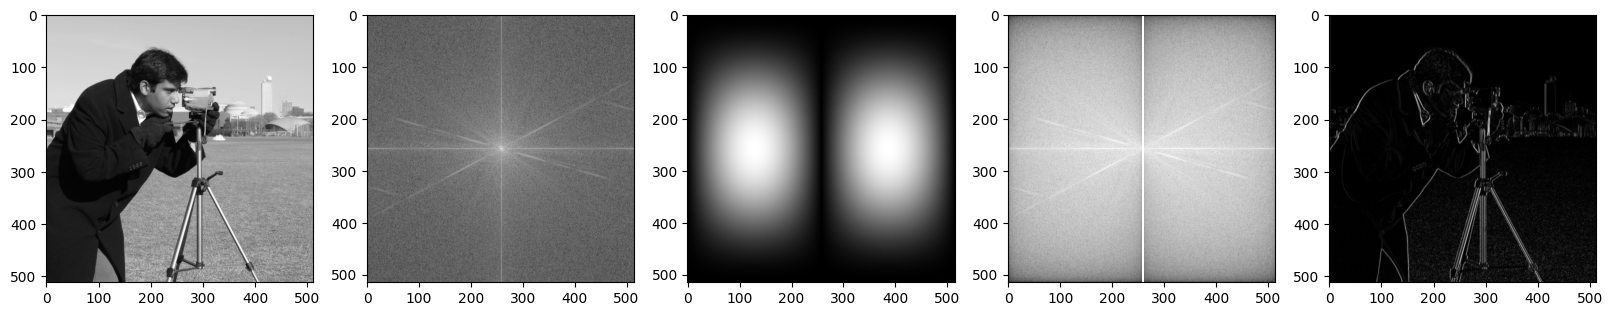

Saving image to: image_processed/camera_gaussian.png
Saving image to: image_processed/camera_sobelx.png


In [106]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    
    image_gaussian = convolve_im(im, gaussian_kernel, verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im(im, sobel_horizontal, verbose)

    if verbose:
        plt.show()

    utils.save_im("camera_gaussian.png", image_gaussian)
    utils.save_im("camera_sobelx.png", image_sobelx)